<a href="https://colab.research.google.com/github/dim447/data_analyst/blob/main/FitoFarm01_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задачи исследования**

### Загружаем данные и объединяем три датасета - ОЗОН позволяется выгружать данные за 3 месяца.



*1. Осмотр данных*
- посмотрим начало и конец датасета
- сделаем предварительные выводы
- поищем аномалии



*2. Обработка данных*
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- подсчитать и добавить цену квадратного метра
- добавить месяц - вместо даты название месяца
- посмотреть разную статистику, связь товара и склада отгрузки,региона доставки


*3. Ответы на вопросы*
- Какой самый популярный чай? Укажите наиболее важные характеристики
и постройте графики?
- Какую сумму приносит каждая позиция?
- Какие регионы больше всего покупают, какие склады использовать?
- Как загружены склады отгрузки?
- Проверим, куда больше отправляют товар по каждой позиции!



*4. Результаты исследования*
- Общие выводы
- Рекомендации


*Описание данных:*

*   'Дата отгрузки' - Дата отгрузки товара
*   'Месяц отгрузки' - Месяц выделяем из даты
*   'Наименование товара' - Наименование товара
*   'Итоговая стоимость товара' - Сумма продажи товара
*   'Количество' - Количество отгруженного товара
*   'Кластер отгрузки' - Логистика ОЗОН
*   'Кластер доставки' - Логистика ОЗОН
*   'Склад отгрузки' - Склад отгрузки ОЗОН
*   'Регион доставки' - Регион доставки товара
*   'Город доставки' - Город доставки товара (не всегда указан)


In [1]:
### Загружаем данные и объединяем три датасета
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df01 = pd.read_csv('/content/orders01_03.csv', sep=';')
df02 = pd.read_csv('/content/orders04_06.csv', sep=';')
df03 = pd.read_csv('/content/orders07_09.csv', sep=';')
df = pd.concat([df01, df02, df03])
df.shape


(3110, 32)

In [ ]:
df.head(5)

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия
0,32901413-0114,32901413-0114-1,2023-03-31 19:48:33,2023-04-01 02:00:00,Доставлен,2023-04-05 11:24:30,157.0,RUB,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,482739289,...,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда,ПВЗ,Не премиум,нет,Ozon Карта,NaN
1,33790736-0039,33790736-0039-2,2023-03-31 19:10:52,2023-04-01 01:00:00,Доставлен,2023-04-01 17:18:39,318.0,RUB,"Чай липы цветки 50г/ травяной сбор ""Целебная П...",520745178,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN
2,32901413-0113,32901413-0113-1,2023-03-31 11:17:55,2023-04-01 02:00:00,Отменен,NaN,157.0,RUB,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,482739289,...,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда,ПВЗ,Не премиум,нет,Ozon Карта,NaN
3,31169688-0104,31169688-0104-1,2023-03-31 10:46:57,2023-04-01 01:30:00,Доставлен,2023-04-06 11:15:52,260.0,RUB,"Чай мяты перечной листья 50г/ травяной сбор ""Ц...",520746323,...,Урал,Сургут,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Ханты-Мансийский Автономный округ - Югра,Нягань,ПВЗ,Премиум,нет,Ozon Карта,NaN
4,33007656-0150,33007656-0150-2,2023-03-31 08:43:59,2023-04-06 01:00:00,Доставлен,2023-04-07 06:31:46,157.0,RUB,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,482743810,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN


In [2]:
df.tail(5)

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия
1187,35783531-0156,35783531-0156-5,2023-07-02 18:54:18,2023-07-03 01:00:00,Доставлен,2023-07-03 14:06:18,173.0,RUB,Чай травяной Друг Вашего иммунитета ф/п 1.5г №...,482738941,...,Санкт-Петербург и СЗО,Санкт-Петербург Юг,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN
1188,0102531753-0026,0102531753-0026-1,2023-07-02 11:44:48,2023-07-02 15:00:00,Доставлен,2023-07-04 13:12:38,154.0,RUB,Чай травяной Друг Вашей поджелудочной железы ф...,482739358,...,Урал,Пермь,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Пермский Край,NaN,ПВЗ,Не премиум,нет,Картой онлайн,NaN
1189,51214417-0152,51214417-0152-1,2023-07-02 03:18:25,2023-07-06 13:30:00,Доставлен,2023-07-07 16:50:12,179.0,RUB,Чай травяной Друг Вашей печени ф/п 1.5г №20 /2...,482743434,...,Санкт-Петербург и СЗО,Петрозаводск,СПБ_БУГРЫ_РФЦ,Республика Карелия,NaN,ПВЗ,Не премиум,нет,Ozon Карта,NaN
1190,0112768158-0113,0112768158-0113-1,2023-07-01 15:50:03,2023-07-05 00:00:00,Доставлен,2023-07-07 14:24:28,170.0,RUB,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,482743810,...,Юг,Краснодар,НОВОРОССИЙСК_МРФЦ,Краснодарский Край,NaN,ПВЗ,Не премиум,нет,Картой онлайн,NaN
1191,0106804299-0105,0106804299-0105-1,2023-07-01 05:35:25,2023-07-02 01:00:00,Доставлен,2023-07-03 07:58:04,179.0,RUB,Чай травяной Друг Вашей печени ф/п 1.5г №20 /2...,482743434,...,Санкт-Петербург и СЗО,Ленинградская область Юг,САНКТ-ПЕТЕРБУРГ_РФЦ,Ленинградская Область,Тосно,ПВЗ,Не премиум,нет,Картой онлайн,NaN


In [3]:
df.columns

Index(['Номер заказа', 'Номер отправления', 'Принят в обработку',
       'Дата отгрузки', 'Статус', 'Дата доставки', 'Сумма отправления',
       'Код валюты отправления', 'Наименование товара', 'OZON id', 'Артикул',
       'Итоговая стоимость товара', 'Код валюты товара', 'Количество',
       'Стоимость доставки', 'Связанные отправления', 'Выкуп товара',
       'Цена товара до скидок', 'Скидка %', 'Скидка руб', 'Акции',
       'Объемный вес товаров, кг', 'Кластер отгрузки', 'Кластер доставки',
       'Склад отгрузки', 'Регион доставки', 'Город доставки',
       'Способ доставки', 'Сегмент клиента', 'Юридическое лицо',
       'Способ оплаты', 'Штрихкод ювелирного изделия'],
      dtype='object')

In [7]:
### Убираем ненужные колонки и выбираем случайные 5 записей
# df = df.drop(['Номер заказа', 'Номер отправления', 'Принят в обработку',
#        'Дата доставки', 'Сумма отправления',
#        'Код валюты отправления','OZON id', 'Артикул','Связанные отправления', 'Выкуп товара',
#        'Цена товара до скидок', 'Скидка %', 'Скидка руб', 'Акции',
#        'Объемный вес товаров, кг','Способ доставки', 'Сегмент клиента', 'Юридическое лицо',
#        'Способ оплаты', 'Штрихкод ювелирного изделия','Код валюты товара','Стоимость доставки'], axis=1)

df.sample(5)

,Дата отгрузки,Статус,Наименование товара,Итоговая стоимость товара,Количество,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки
62,2023-09-25 11:00:00,Доставляется,Чай травяной детская линия Комфорт в боботике ...,150.0,1,Центр,Ленинградская область Юг,СОФЬИНО_РФЦ,Ленинградская Область,Сосновый Бор
393,2023-09-08 01:00:00,Доставлен,Чай травяной детская линия Комфорт в боботике ...,155.0,1,"Москва, МО и дальние регионы",Московская область Восток 1,ПУШКИНО_1_РФЦ,Московская Область,NaN
907,2023-08-01 08:30:00,Доставлен,Чай травяной Имбирь с облепихой ф/п 1.5г №20 /...,154.0,1,Поволжье,Минск,НИЖНИЙ_НОВГОРОД_РФЦ,Минская область,Фаниполь
493,2023-04-27 01:00:00,Доставлен,Чай травяной Друг Вашей памяти ф/п 1.5г №20 / ...,155.0,1,Центр и дальние регионы,Московская область Север 3,ПУШКИНО_1_РФЦ,Московская Область,Ивантеевка
1081,2023-01-11 18:00:00,Доставлен,"Чай липы цветки 50г/ травяной сбор ""Целебная П...",318.0,1,Юг,Ростов,РОСТОВ-НА-ДОНУ_РФЦ,Ростовская Область,Ростов-на-Дону


In [8]:
### Посчитаем статистику того, что можно считать: Стоимость и количество
df.describe()

,Итоговая стоимость товара,Количество
count,3110.000000,3110.000000
mean,200.999942,1.008039
std,130.265519,0.122690
min,108.000000,1.000000
25%,154.000000,1.000000
50%,164.000000,1.000000
75%,179.000000,1.000000
max,950.000000,5.000000


In [11]:
# Применим сортировку по месяцам, изначально сортировка была по алфавиту, что не очень удобно.
df['Дата отгрузки'] = pd.to_datetime(df['Дата отгрузки'], format="%Y-%m-%dT%H:%M:%S")
# df['Месяц отгрузки'] = df['Месяц отгрузки'].fillna('September')
df.insert(1, 'Месяц отгрузки', df['Дата отгрузки'].dt.month_name())
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Месяц отгрузки'] = pd.Categorical(df['Месяц отгрузки'], categories=months, ordered=True)
df.sample(5)


,Дата отгрузки,Месяц отгрузки,Статус,Наименование товара,Итоговая стоимость товара,Количество,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки
1081,2023-01-11 18:00:00,January,Доставлен,"Чай липы цветки 50г/ травяной сбор ""Целебная П...",318.0,1,Юг,Ростов,РОСТОВ-НА-ДОНУ_РФЦ,Ростовская Область,Ростов-на-Дону
471,2023-09-04 08:00:00,September,Доставлен,Чай травяной Друг Вашей поджелудочной железы ф...,171.0,1,Санкт-Петербург и СЗО,Великий Новгород,СПБ_ШУШАРЫ_РФЦ,Новгородская Область,Великий Новгород
865,2023-01-24 15:30:00,January,Доставлен,"Чай липы цветки 50г/ травяной сбор ""Целебная П...",318.0,1,Центр и дальние регионы,Москва Запад (Недействительный),ПУШКИНО_1_РФЦ,Москва,Москва
283,2023-03-09 08:30:00,March,Доставлен,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,116.0,1,Поволжье,Московская область Восток (Недействительный),САМАРА_РФЦ,Московская Область,Егорьевск
902,2023-07-30 08:00:00,July,Доставлен,Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /...,153.0,1,Санкт-Петербург и СЗО,Мурманск,СПБ_БУГРЫ_РФЦ,Мурманская Область,Мурманск


In [22]:
# теперь можем видеть количество товара отгруженного по месяцам
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count()

Месяц отгрузки
January      459
February     372
March        381
April        253
May          243
June         187
July         303
August       382
September    530
October        0
November       0
December       0
Name: Количество, dtype: int64

<Axes: xlabel='Месяц отгрузки'>

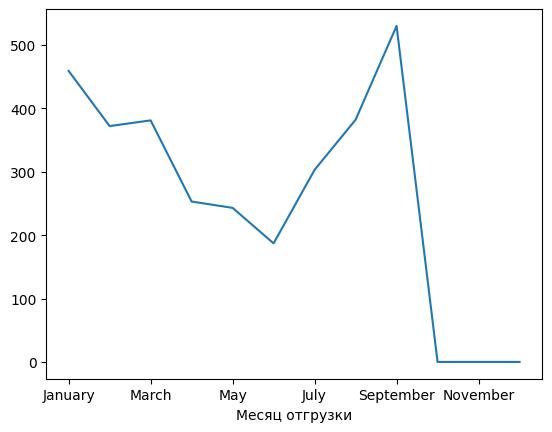

In [23]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count().plot()

In [21]:
# а также сумму, не всегда большее количество соответсвует большей сумме
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Месяц отгрузки
January       81841.00
February      84776.18
March         74191.38
April         50470.82
May           46445.00
June          42635.50
July          67034.25
August        76747.00
September    100968.69
October           0.00
November          0.00
December          0.00
Name: Итоговая стоимость товара, dtype: float64

<Axes: xlabel='Месяц отгрузки'>

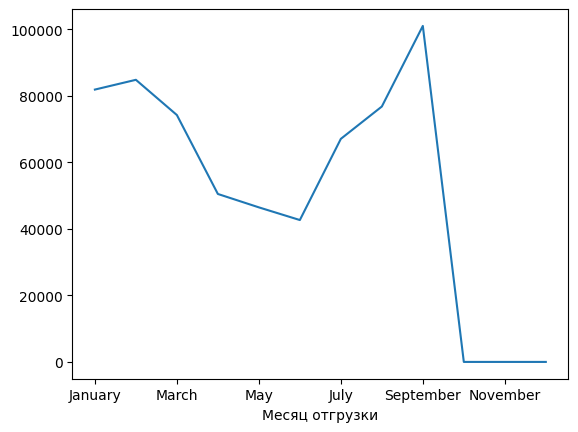

In [20]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum().plot()

In [16]:
### Выведем общую сумму продаж
df['Итоговая стоимость товара'].sum()

625109.8200000001

In [17]:
### Дубликаты есть, потому названия товара повторяются
df.duplicated().sum()

498

In [18]:
### Ищем нулевые ячейки, нас интересует месяц отгрузки и дата отгрузки
df.isnull().sum().sort_values()

Статус                         0
Наименование товара            0
Итоговая стоимость товара      0
Количество                     0
Кластер доставки               0
Склад отгрузки                 0
Кластер отгрузки               6
Регион доставки               15
Дата отгрузки                 18
Месяц отгрузки                18
Город доставки               412
dtype: int64

In [19]:
# В основном это последние продажи - сентябрь, заменим нулевые значения на сентябрь.
# Регион и город доставки, Кластер отгрузки могут быть не указаны
df['Месяц отгрузки'] = df['Месяц отгрузки']. fillna ('September')
df['Дата отгрузки'] = df['Дата отгрузки']. fillna ('2023-09-01 01:00:00')
df.isnull().sum().sort_values()

Дата отгрузки                  0
Месяц отгрузки                 0
Статус                         0
Наименование товара            0
Итоговая стоимость товара      0
Количество                     0
Кластер доставки               0
Склад отгрузки                 0
Кластер отгрузки               6
Регион доставки               15
Город доставки               412
dtype: int64

In [24]:
# Склад отгрузки нет нулевых значений, посмотрим уникальные названия
df['Склад отгрузки'].unique()

array(['АДЫГЕЙСК_РФЦ', 'СПБ_БУГРЫ_РФЦ', 'ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ',
       'ПУШКИНО_2_РФЦ', 'САМАРА_РФЦ', 'ПУШКИНО_1_РФЦ', 'ВОРОНЕЖ_МРФЦ',
       'НИЖНИЙ_НОВГОРОД_РФЦ', 'КАЗАНЬ_РФЦ_НОВЫЙ', 'РОСТОВ-НА-ДОНУ_РФЦ',
       'НОВОСИБИРСК_РФЦ_НОВЫЙ', 'FRESH_MAX_РСТ_ШОЛОХОВО',
       'САНКТ-ПЕТЕРБУРГ_РФЦ', 'КАЛИНИНГРАД_МРФЦ', 'НОВОРОССИЙСК_МРФЦ',
       'FRESH_MAX_РСТ_ЗАПАДНЫЙ', 'КРАСНОЯРСК_МРФЦ', 'ХОРУГВИНО_РФЦ',
       'FRESH_MAX_КДР_ПОНОМАРЕНКО', 'ТВЕРЬ_РФЦ', 'FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ',
       'ЖУКОВСКИЙ_РФЦ', 'FRESH_MAX_КДР_МЕДИА_ПЛАЗА', 'СОФЬИНО_РФЦ',
       'СПБ_ШУШАРЫ_РФЦ'], dtype=object)

In [25]:
# Посмотрим откуда больше всего отгружается товар и отсортируем его по убыванию
sklad_otgruzki = df.groupby('Склад отгрузки')['Количество'].count()
sklad_otgruzki.sort_values(ascending=False)

Склад отгрузки
ПУШКИНО_1_РФЦ                585
САМАРА_РФЦ                   392
СПБ_БУГРЫ_РФЦ                314
ЖУКОВСКИЙ_РФЦ                238
ПУШКИНО_2_РФЦ                221
НИЖНИЙ_НОВГОРОД_РФЦ          192
НОВОРОССИЙСК_МРФЦ            173
ВОРОНЕЖ_МРФЦ                 158
ХОРУГВИНО_РФЦ                138
ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ       133
РОСТОВ-НА-ДОНУ_РФЦ           124
САНКТ-ПЕТЕРБУРГ_РФЦ          119
АДЫГЕЙСК_РФЦ                 117
СПБ_ШУШАРЫ_РФЦ                80
ТВЕРЬ_РФЦ                     57
КАЗАНЬ_РФЦ_НОВЫЙ              33
СОФЬИНО_РФЦ                   21
КРАСНОЯРСК_МРФЦ                6
НОВОСИБИРСК_РФЦ_НОВЫЙ          2
FRESH_MAX_КДР_ПОНОМАРЕНКО      2
КАЛИНИНГРАД_МРФЦ               1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА      1
FRESH_MAX_РСТ_ШОЛОХОВО         1
FRESH_MAX_РСТ_ЗАПАДНЫЙ         1
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ         1
Name: Количество, dtype: int64

In [44]:
# Регион доставки можем также отсортировать,
# 14 нулевых значений не играют большой роли, это скорее всего еще не доставленные товары
reg_deliver = df.groupby(['Регион доставки'])['Количество'].count().sort_values(ascending=False)
reg_deliver.head(20)

Регион доставки
Москва                     544
Московская Область         501
Краснодарский Край         273
Санкт-Петербург            270
Ленинградская Область      127
Ростовская Область         104
Татарстан Республика        95
Самарская Область           80
Воронежская Область         72
Нижегородская Область       63
Волгоградская Область       48
Свердловская Область        42
Башкортостан Республика     33
Мурманская Область          33
Крым Республика             33
Саратовская Область         32
Республика Коми             32
Вологодская Область         32
Ульяновская Область         31
Тверская Область            31
Name: Количество, dtype: int64

In [30]:
# Проверим, что самое популярное из товара, отсортируем продажи по Наименованию и количеству продаж.
df.groupby('Наименование товара')['Количество'].count().sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           470
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             369
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                              191
Чай травяной Друг Вашей печени ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                             179
Чай травяной Друг Вашего давления ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                          158
Чайный напиток травяной листья Брусники ф/п 1,5г №20/ 20 пакетиков  Фитосбор, фиточай, БАД, Травяной сбор    153
Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД                             135
Чай травяной Домбайский вальс Облепиха ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай                          124
Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай

In [28]:
### Отсортируем Товар по сумме продаж.
df.groupby('Наименование товара')['Итоговая стоимость товара'].sum().sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           74980.04
Экстракт трав в капсулах "Друг вашей поджелудочной железы", 60 капсул, БАД                                   59798.34
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             59484.70
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                              31165.33
Чай травяной Друг Вашей печени ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                             29509.47
Чай липы цветки 50г/ травяной сбор "Целебная Поляна"                                                         27675.00
Чайный напиток травяной листья Брусники ф/п 1,5г №20/ 20 пакетиков  Фитосбор, фиточай, БАД, Травяной сбор    25301.60
Чай травяной Друг Вашего давления ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                          25043.87
Чай травяной Друг Вашего сна ф/п 1.5

In [31]:
# Проверим куда больше отправляют товар, отсортируем Наименование и регион доставки
name_region = df.groupby(['Наименование товара', 'Регион доставки'])['Количество'].count()
name_region.head(50)


Наименование товара                                                    Регион доставки                         
Фитосбор "Для печени", 2 пачки по 20 фильтр-пакетов травяного чая      Брянская Область                            2
                                                                       Владимирская Область                        1
                                                                       Волгоградская Область                       1
                                                                       Калининградская Область                     1
                                                                       Калужская Область                           1
                                                                       Краснодарский Край                          3
                                                                       Москва                                      3
                                                                     

In [36]:
# Еще один параметр - склад отгрузки. Какой товар больше отправляют с какого склада.
name_sklad = df.groupby(['Склад отгрузки', 'Наименование товара'])['Количество'].count()
name_sklad.head(50)

Склад отгрузки             Наименование товара                                                                                      
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА  Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_КДР_ПОНОМАРЕНКО  Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              2
FRESH_MAX_РСТ_ЗАПАДНЫЙ     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_РСТ_ШОЛОХОВО     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
АДЫГЕЙСК_РФЦ               Фитосбор "Для печени", 2 пачки по 20 фильтр-пакетов травяного чая                                             1
                           Фитосб

In [41]:
# Также можно вывести отдельно по каждой позиции статистику по месяцам: Количество и Сумму.
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', df['Статус'] != 'Отменен', 'Месяц отгрузки'])['Количество'].count()

Наименование товара  Статус  Месяц отгрузки
False                False   January            15
                             February            9
                             March              12
                             April               6
                             May                 5
                             June                6
                             July                7
                             August              9
                             September          18
                             October             0
                             November            0
                             December            0
                     True    January           388
                             February          329
                             March             305
                             April             191
                             May               209
                             June              150
                             July     

In [ ]:
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', 'Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Наименование товара  Месяц отгрузки
False                January           73468.00
                     February          78703.66
                     March             64296.02
                     April             41935.34
                     May               41955.06
                     June              37462.00
                     July              58323.26
                     August            66312.42
                     September          3878.00
                     October               0.00
                     November              0.00
                     December              0.00
True                 January            8373.00
                     February           6072.52
                     March              9895.36
                     April              8535.48
                     May                4489.94
                     June               5173.50
                     July               8710.99
                     August             9450.58
    

# 4. Результаты исследования

### Общие выводы
С помощью данного инструмента (pandas) мы можем провести анализ как по каждой позиции - количество продаж, сумма, с какого склада и в какой регион больше отправка, так и видеть общую картину в целом. Определять пик продаж по месяцам, а нужно и по неделям. Группировать продажи, комбинировать разные параметры. Визуализация позволяет строить как обычные графики, так и в виде гистограм, круговых диаграм. Данный пример показывает возможности обработки данных его анализа и вывода результатов. Также возможен вывод данных в любой удобный формат, как ecxel, csv, json.
### Рекомендации
1.   Рекомендовать увеличить поставки наиболее продаваемого товара
2.   Использовать скидки в месяцы с наименьшими продажами
3.   В летние месяцы спад продаж, осенью и зимой больше затаривать склады
4.   Больше поставлять товар в регионы, но и не забывать про центр и северо-запад.



